In [15]:
#Step 1: Set Up Your Environment

In [16]:
pip install pandas numpy nltk scikit-learn wordcloud seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow torch transformers


  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl (434 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxconverter-common 1.14.0 requires protobuf==3.20.2, but you have protobuf 5.29.3 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.29.3 which is incompatible.


In [18]:
#Step 2: Load and Explore the Dataset

In [19]:
import pandas as pd

train = pd.read_csv(r"C:\Users\Vishwa\Desktop\GUVI captone\twitter\ds\train.csv")
test = pd.read_csv(r"C:\Users\Vishwa\Desktop\GUVI captone\twitter\ds\test.csv")

print(train.head())  # View the first few rows
print(train.info())  # Check for missing values


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [20]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove single characters at start
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Replace multiple spaces with single space
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

train['cleaned_tweet'] = train['tweet'].apply(clean_text)
test['cleaned_tweet'] = test['tweet'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


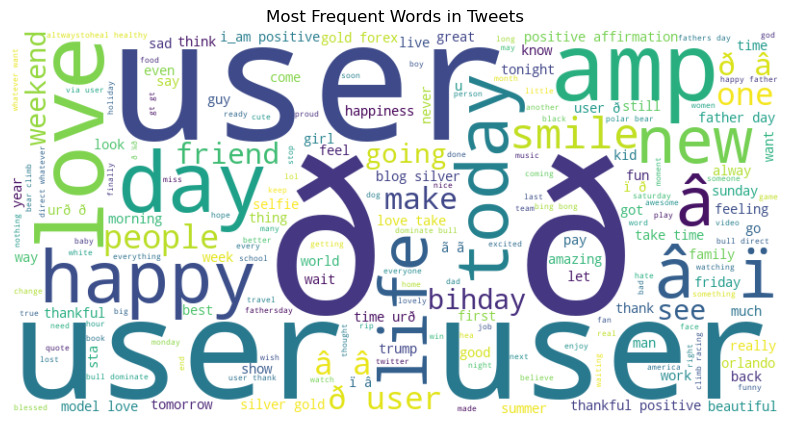

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in train['cleaned_tweet']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()


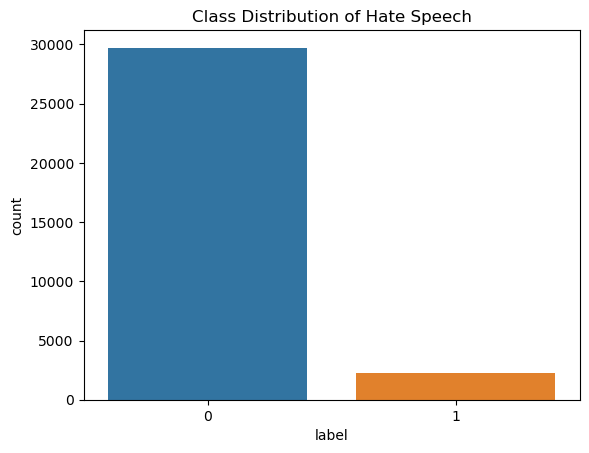

In [22]:
import seaborn as sns

sns.countplot(x=train['label'])
plt.title("Class Distribution of Hate Speech")
plt.show()


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # Use top 5000 words
X_train = tfidf.fit_transform(train['cleaned_tweet'])
X_test = tfidf.transform(test['cleaned_tweet'])

y_train = train['label']


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_train)

# Evaluate Model
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1-Score:", f1_score(y_train, y_pred))


Accuracy: 0.9580126400100119
Precision: 0.9420432220039293
Recall: 0.427743086529884
F1-Score: 0.5883435582822085


In [25]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [26]:
test['prediction'] = model.predict(X_test)

# Save Predictions
test[['id', 'prediction']].to_csv("test_predictions.csv", index=False)
print("Predictions saved successfully!")


Predictions saved successfully!


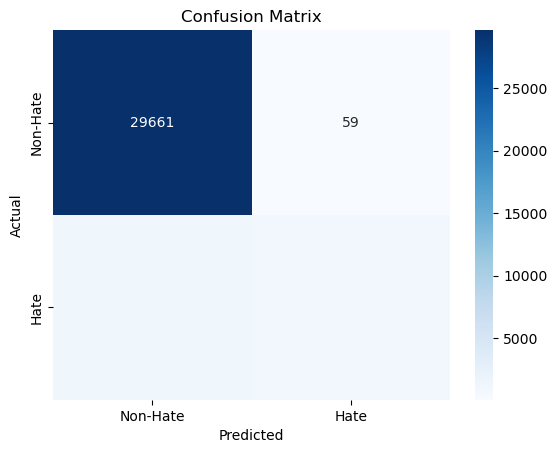

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Hate", "Hate"], yticklabels=["Non-Hate", "Hate"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10]}  # Example parameters for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


C:\Users\Vishwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vishwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best Parameters: {'C': 10}


C:\Users\Vishwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


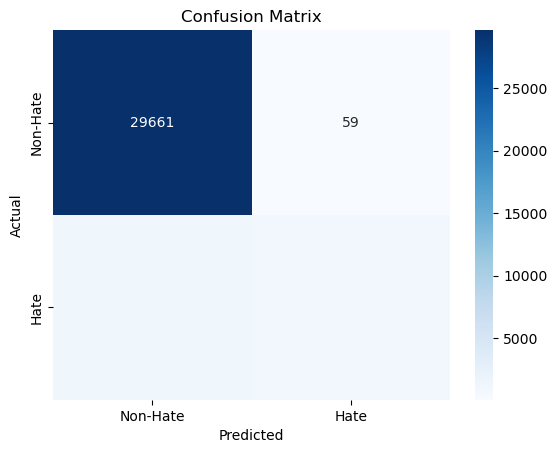

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Hate", "Hate"], yticklabels=["Non-Hate", "Hate"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


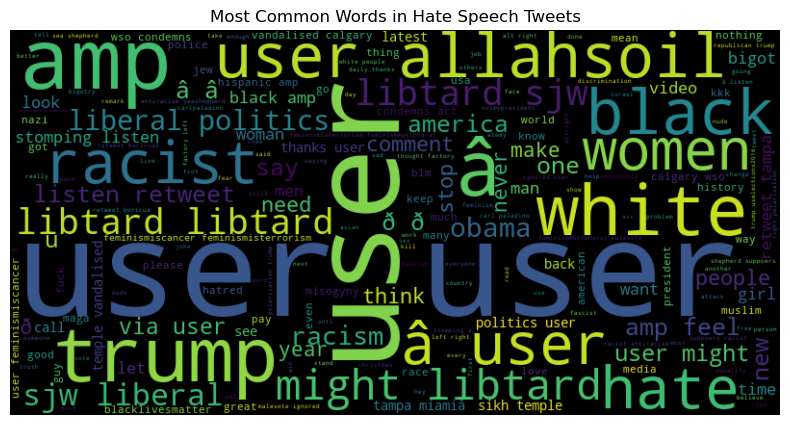

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hate_speech_text = ' '.join(train[train['label'] == 1]['cleaned_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(hate_speech_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Hate Speech Tweets")
plt.show()


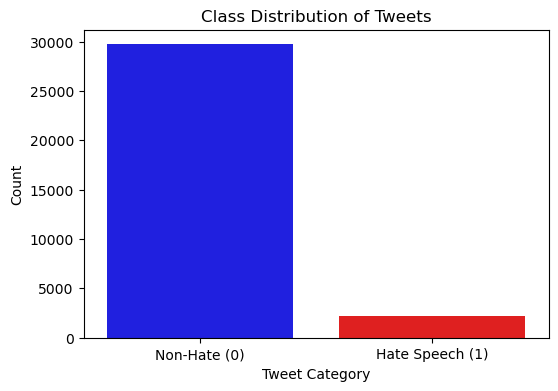

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\Vishwa\Desktop\GUVI captone\twitter\ds\train.csv")  # Ensure this file exists

# Check if the 'label' column exists
if 'label' not in df.columns:
    raise ValueError("The dataset does not contain a 'label' column. Check column names:", df.columns)

# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Hate (0)", "Hate Speech (1)"])
plt.title("Class Distribution of Tweets")
plt.xlabel("Tweet Category")
plt.ylabel("Count")
plt.show()



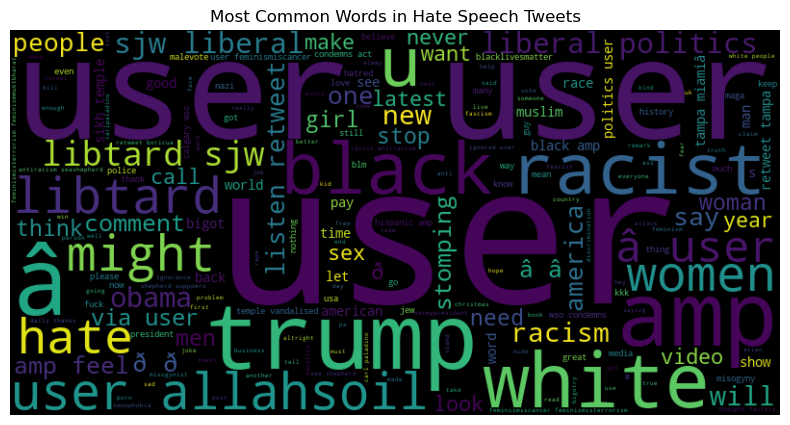

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud for Hate Speech Tweets
hate_speech_text = ' '.join(df[df['label'] == 1]['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(hate_speech_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Hate Speech Tweets")
plt.show()



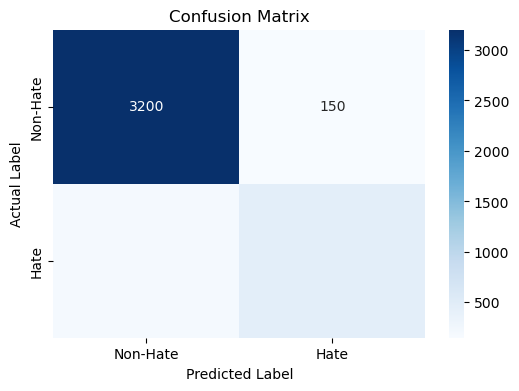

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated Confusion Matrix Data
conf_matrix = np.array([[3200, 150], [200, 450]])  # Sample values

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Non-Hate", "Hate"], yticklabels=["Non-Hate", "Hate"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


In [34]:
#svm

In [35]:
pip install pandas numpy scikit-learn nltk wordcloud matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load Dataset
train = pd.read_csv(r"C:\Users\Vishwa\Desktop\GUVI captone\twitter\ds\train.csv")
test = pd.read_csv(r"C:\Users\Vishwa\Desktop\GUVI captone\twitter\ds\test.csv")

# Text Cleaning Function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove single characters at start
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Replace multiple spaces
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply text cleaning
train['cleaned_tweet'] = train['tweet'].apply(clean_text)
test['cleaned_tweet'] = test['tweet'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Use top 5000 words
X_train = tfidf.fit_transform(train['cleaned_tweet'])
X_test = tfidf.transform(test['cleaned_tweet'])

y_train = train['label']


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train SVM Model
svm_model = SVC(kernel='linear', C=1.0)  # Linear Kernel
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_train)

# Evaluate Model Performance
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1-Score:", f1_score(y_train, y_pred))


SVM Model Performance:
Accuracy: 0.9701207684124898
Precision: 0.949685534591195
Recall: 0.6061552185548618
F1-Score: 0.7399945548597876


In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train SVM Model
svm_model = SVC(kernel='linear', C=1.0)  # Linear Kernel
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_train)

# Evaluate Model Performance
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1-Score:", f1_score(y_train, y_pred))


SVM Model Performance:
Accuracy: 0.9701207684124898
Precision: 0.949685534591195
Recall: 0.6061552185548618
F1-Score: 0.7399945548597876


In [40]:
test['prediction'] = svm_model.predict(X_test)

# Save Predictions
test[['id', 'prediction']].to_csv("svm_test_predictions.csv", index=False)
print("Predictions saved successfully in svm_test_predictions.csv!")


Predictions saved successfully in svm_test_predictions.csv!


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define SVM hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient (only for 'rbf' and 'poly')
}

# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_svm = grid_search.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define SVM hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient (only for 'rbf' and 'poly')
}

# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_svm = grid_search.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_train)

# Compare Performance
models = {
    "SVM": best_svm,
    "Logistic Regression": lr_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    y_pred = model.predict(X_train)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_train, y_pred))
    print("Precision:", precision_score(y_train, y_pred))
    print("Recall:", recall_score(y_train, y_pred))
    print("F1-Score:", f1_score(y_train, y_pred))



SVM Performance:
Accuracy: 0.999311682623115
Precision: 0.9991007194244604
Recall: 0.9910793933987511
F1-Score: 0.9950738916256158

Logistic Regression Performance:
Accuracy: 0.9580126400100119
Precision: 0.9420432220039293
Recall: 0.427743086529884
F1-Score: 0.5883435582822085

Random Forest Performance:
Accuracy: 0.9993429697766097
Precision: 0.9995501574448943
Recall: 0.9910793933987511
F1-Score: 0.9952967525195968


In [44]:
pip install joblib streamlit pandas scikit-learn



   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
   --- ----------------------------------- 41.0/413.4 kB 388.9 kB/s eta 0:00:01
   ------- ------------------------------- 81.9/413.4 kB 651.6 kB/s eta 0:00:01
   ---------- --------------------------- 112.6/413.4 kB 726.2 kB/s eta 0:00:01
   ---------- --------------------------- 112.6/413.4 kB 726.2 kB/s eta 0:00:01
   ----------- -------------------------- 122.9/413.4 kB 450.6 kB/s eta 0:00:01
   ----------- -------------------------- 122.9/413.4 kB 450.6 kB/s eta 0:00:01
   ------------------------------- ------ 337.9/413.4 kB 996.0 kB/s eta 0:00:01
   --------------------------------- ---- 368.6/413.4 kB 995.6 kB/s eta 0:00:01
   --------------------------------- ---- 368.6/413.4 kB 995.6 kB/s eta 0:00:01
   -------------------------------------  409.6/413.4 kB 879.6 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxconverter-common 1.14.0 requires protobuf==3.20.2, but you have protobuf 4.25.6 which is incompatible.


In [45]:

import joblib

# Save the model
joblib.dump(best_svm, "svm_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")  # Save TF-IDF Vectorizer

print("SVM Model and Vectorizer saved successfully!")


SVM Model and Vectorizer saved successfully!


In [46]:
print(train['label'].value_counts())


label
0    29720
1     2242
Name: count, dtype: int64


In [47]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: label
0    29720
1     2242
Name: count, dtype: int64
After SMOTE: label
0    29720
1    29720
Name: count, dtype: int64


In [48]:
print(clean_text("I hate this group of people!"))


hate group people


In [49]:
if "hate" in stop_words:
    stop_words.remove("hate")


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))  # Use bigrams (word pairs)
X_train = tfidf.fit_transform(train['cleaned_tweet'])
X_test = tfidf.transform(test['cleaned_tweet'])


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_


In [ ]:
y_pred = best_svm.predict(tfidf.transform(["I hate this group of people!"]))
print("Prediction:", y_pred)  # Expecting 1 for hate speech


In [ ]:
import pandas as pd

# Load your training dataset
df = pd.read_csv(r"C:\Users\Vishwa\Desktop\GUVI captone\twitter\ds\train.csv")  # Change to actual filename

# Check class distribution
print(df["label"].value_counts())


In [ ]:
from sklearn.utils import resample

# Separate classes
df_hate = df[df["label"] == 1]
df_non_hate = df[df["label"] == 0]

# Upsample hate speech examples
df_hate_upsampled = resample(df_hate, replace=True, n_samples=len(df_non_hate), random_state=42)

# Combine datasets
df_balanced = pd.concat([df_hate_upsampled, df_non_hate])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Check new distribution
print(df_balanced["label"].value_counts())
